# 앙상블(Ensemble) - 1. 보팅, 배깅, 랜덤포레스트

# 보팅( Voting Classifier)

### 개별 분류기의 성능과 보팅 분류기의 성능 비교

### 하드보팅 모델 학습 및 예측

In [3]:
# 위스콘식 유방암 데이터세트
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

b_cancer = load_breast_cancer()
b_cancer.keys()
print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
# 데이터 살펴보기
b_cancer = load_breast_cancer()
data_df = pd.DataFrame(b_cancer.data, columns=b_cancer.feature_names)
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
X = b_cancer.data
y = b_cancer.target

In [6]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,\
    random_state=156)

* 로지스틱 회귀, KNN을 기반으로 한 소프트보팅 분류기

In [7]:
# 서로 다른 개별 학습기 생성
lr_clf = LogisticRegression(max_iter=100000)
knn_Clf = KNeighborsClassifier(n_neighbors=8)
dt_clf = DecisionTreeClassifier(max_depth=3)

# 앙상블 학습기 생성
voting_clf = VotingClassifier([('LR', lr_clf), ('KNN', knn_Clf), ('DT', dt_clf)],\
    voting='soft')
# 앙상블 학습기 학습
voting_clf.fit(X_train, y_train)

train_score = accuracy_score(y_train, voting_clf.predict(X_train))
test_score = accuracy_score(y_test, voting_clf.predict(X_test))

print(train_score)
print(test_score)

0.9758241758241758
0.9473684210526315


In [8]:
# 앙상블하지 않은 각각의 학습기의 성능을 측정하시오.
lr_clf.fit(X_train, y_train)
train_score = accuracy_score(y_train, lr_clf.predict(X_train))
test_score = accuracy_score(y_test, lr_clf.predict(X_test))
print(f'LogisticRegression train score : {train_score}')
print(f'LogisticRegression test score : {test_score}')
knn_Clf.fit(X_train, y_train)
train_score = accuracy_score(y_train, knn_Clf.predict(X_train))
test_score = accuracy_score(y_test, knn_Clf.predict(X_test))
print(f'KNeighborsClassifier train score : {train_score}')
print(f'KNeighborsClassifier test score : {test_score}')
dt_clf.fit(X_train, y_train)
train_score = accuracy_score(y_train, dt_clf.predict(X_train))
test_score = accuracy_score(y_test, dt_clf.predict(X_test))
print(f'DecisionTreeClassifier train score : {train_score}')
print(f'DecisionTreeClassifier test score : {test_score}')

LogisticRegression train score : 0.9582417582417583
LogisticRegression test score : 0.9649122807017544
KNeighborsClassifier train score : 0.9384615384615385
KNeighborsClassifier test score : 0.9385964912280702
DecisionTreeClassifier train score : 0.9736263736263736
DecisionTreeClassifier test score : 0.956140350877193


# Random Forest : 와인 데이터셋

하이퍼 파라미터  
n_estimators: 모형(week learner)의 개수, 순차적으로 오류를 보정해 수가 많으면 성능이 일정 수준까지 높아질 수 있으나, 수행 시간이 오래 걸린다는 단점이 있음(디폴트는 100)  
min_samples_leaf: 말단 리프 노드의 최소한의 샘플 데이터 수, 디폴트 1  
max_depth: 트리의 최대 깊이, 디폴트 3  
max_features: 디폴트는 auto, If “auto”, then max_features=sqrt(n_features) 즉, 피처가 4개면 분할을 위해 2개 참조   

In [9]:
wine_kaggle = pd.read_csv('data/wine_dataset.csv')

In [10]:
# 데이터 분할 :test_size=0.2, random_state=42

wine = wine_kaggle[['alcohol', 'residual_sugar', 'pH', 'style']]
wine.columns = ['alcohol', 'sugar', 'pH', 'style']
wine['style'] = wine['style'].replace('red', 0)
wine['style'] = wine['style'].replace('white', 1)

C:\Users\PlayData\AppData\Local\Temp\ipykernel_7928\566352816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine['style'] = wine['style'].replace('red', 0)
C:\Users\PlayData\AppData\Local\Temp\ipykernel_7928\566352816.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine['style'] = wine['style'].replace('white', 1)


In [11]:
X= wine.iloc[:, :-1]
y = wine.iloc[:, -1]

# 분할 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,\
    y, test_size=0.2, random_state=42)

In [12]:
# RandomForestClassifier 모델 구축, 학습 및 평가

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

train_score = accuracy_score(y_train, rf_clf.predict(X_train))
test_score = accuracy_score(y_test, rf_clf.predict(X_test))

print(train_score)
print(test_score)

0.996921300750433
0.8892307692307693


### 랜덤 포레스트 하이퍼파라미터 튜닝

In [13]:
# 과대적합이므로 그리드서치
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 200, 300, 400, 500], 
    'max_depth' : [3, 5, 7, 9, 11],
    'min_samples_leaf' : [8, 12 ,18],
    'min_samples_split' : [8, 16, 20]
}
grid = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 500}

In [ ]:
best = grid.best_estimator_ # 베스트 모델
best

RandomForestClassifier(max_depth=9, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
train_score = accuracy_score(y_train, best.predict(X_train))
test_score = accuracy_score(y_test, best.predict(X_test))

print(train_score)
print(test_score)

0.8964787377333077
0.8638461538461538


* [참고] 트리 갯수 300개로 증가시킨후 학습 -> 별도의 테스트 데이터셋에서 예측 -> 성능측정

### 특성 중요도(feature importances)

In [ ]:
best.feature_importances_

array([0.16107679, 0.61928965, 0.21963356])

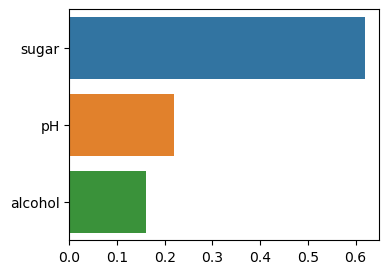

In [ ]:
f_imp = pd.Series(data=best.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(4, 3))
sns.barplot(x=f_imp.values, y=f_imp.index)
plt.show()

# [실습]  사용자 행동 인식 데이터 세트 랜덤포레스트 분류하라
(기본 모델 -> 하이퍼파라미터 튜닝 -> 피처 중요도 시각화)

### 랜덤 포레스트 하이퍼 파라미터 튜닝

### 피처별 중요도 시각화

# 실습] 타이타닉 데이터셋 랜덤 포레스트 분류
기본 모델 - 하이퍼파라미터 튜닝 - 특성 중요도 시각화

In [22]:
train = pd.read_csv('titanic/df_titanic.csv')

In [23]:
train

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_1
0,0,22.0,1,0,1.981001,0,1,1
1,1,38.0,1,0,4.266662,0,0,0
2,1,26.0,0,0,2.070022,0,1,0
3,1,35.0,1,0,3.972177,0,0,0
4,0,35.0,0,0,2.085672,0,1,1
...,...,...,...,...,...,...,...,...
1038,1,3.0,1,1,2.622855,0,1,0
1039,1,37.0,1,0,4.499810,0,0,0
1040,1,28.0,0,0,2.050913,0,1,0
1041,1,39.0,0,0,4.690430,0,0,0


In [24]:
X = train.drop(columns='Survived')
y = train['Survived']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
dt_clf.fit(X_train, y_train)
print(accuracy_score(y_train, dt_clf.predict(X_train)))
print(accuracy_score(y_test, dt_clf.predict(X_test)))

0.8633093525179856
0.9043062200956937


### 하이퍼 파라미터

In [ ]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.


In [26]:
rf_clf.fit(X_train, y_train)
train_score = accuracy_score(y_train, rf_clf.predict(X_train))
test_score = accuracy_score(y_test, rf_clf.predict(X_test))

print(train_score)
print(test_score)

0.986810551558753
0.8086124401913876


In [27]:
# GridSearchCV()를 활용한 최적의 파라미터 찾기
params = {
    'n_estimators' : [100, 200, 300, 400, 500], 
    'max_depth' : [3, 5, 7, 9, 11],
    'min_samples_leaf' : [8, 12 ,18],
    'min_samples_split' : [8, 16, 20]
}
grid = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [28]:
grid.best_params_

{'max_depth': 11,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 300}

### 특성 중요도

In [29]:
best = grid.best_estimator_
best

RandomForestClassifier(max_depth=11, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [30]:
best.feature_importances_

array([0.09079822, 0.02363469, 0.03678492, 0.15649737, 0.01882504,
       0.06282865, 0.61063111])

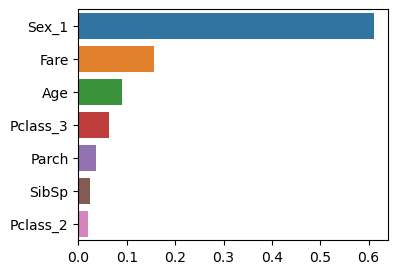

In [31]:
f_imp = pd.Series(data=best.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(4, 3))
sns.barplot(x=f_imp.values, y=f_imp.index)
plt.show()

# 실습] 와인데이터셋 랜덤포레스트 분류하기
기본 모델 -> 튜닝 -> 점수 ->  특성 중요도 시각화